In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from utils import *
from rubin_sim.site_models import Almanac
from rubin_sim.utils import _angularSeparation

In [2]:
streak_width = 1.  # arcsec
const = starlink_constellation()

In [3]:
len(const)

30000

In [4]:
constellation = Constellation(const,  alt_limit=20.)

In [5]:
# maybe load up the almanac, then for each night generate 10 times
alm = Almanac()

In [6]:

# Define a delta-t of 30 seconds
delta_t = 30./3600./24.

for sat in constellation.sat_list:
    sat._epoch = alm.sunsets[10]['sunset'] - 15129

In [7]:
def calc_lengths(alt_rad1, az_rad1, alt_rad2, az_rad2, alt_limit=np.radians(20.)):
    
    # Be generous, demand both alts be above limit
    #above_limit = np.where((alt_rad1 > alt_limit) & (alt_rad2 > alt_limit))[0]
    # just demand that it start above limit. Things moving out should balance things moving in.
    above_limit = np.where((alt_rad1 > alt_limit))[0]
    lengths =  _angularSeparation(az_rad1[above_limit], alt_rad1[above_limit],
                                 az_rad2[above_limit], alt_rad2[above_limit])
    return lengths

In [8]:
alt_limit_20 = np.radians(20.)
alt_limit_30 = np.radians(30.)
alt_limit_80 = np.radians(80.)


mjd_result = []
lengths_20 = []
lengths_30 = []
lengths_80 = []
rel_time = []
nights = []


for i in np.arange(0,366,20):
    mjds = np.linspace(alm.sunsets[i]['sun_n12_setting'], alm.sunsets[i]['sun_n12_rising'], 11)

    
    for mjd in mjds:
        constellation.update_mjd(mjd)
        alt_rad1 = constellation.altitudes_rad + 0
        az_rad1 = constellation.azimuth_rad + 0


        constellation.update_mjd(mjd+delta_t)
        alt_rad2 = constellation.altitudes_rad + 0
        az_rad2 = constellation.azimuth_rad + 0

        lengths_20.append(np.sum(calc_lengths(alt_rad1, az_rad1, alt_rad2, az_rad2, alt_limit=alt_limit_20)))
        lengths_30.append(np.sum(calc_lengths(alt_rad1, az_rad1, alt_rad2, az_rad2, alt_limit=alt_limit_30)))
        lengths_80.append(np.sum(calc_lengths(alt_rad1, az_rad1, alt_rad2, az_rad2, alt_limit=alt_limit_80)))

    mjd_result.append(mjds)
    rel_time.append(mjds-np.mean(mjds))
    nights.append(mjds*0+i)

In [9]:
nights = np.concatenate(nights)
rel_time = np.concatenate(rel_time)

Text(0.5, 1.0, 'Altitude limit of 20 deg')

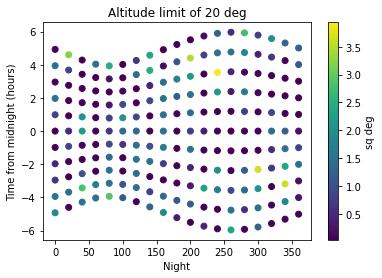

In [10]:
ack = plt.scatter(nights,rel_time*24,  c=np.degrees(lengths_20)*streak_width/3600.)
cb = plt.colorbar()
cb.set_label('sq deg')
plt.ylabel('Time from midnight (hours)')
plt.xlabel('Night')
plt.title('Altitude limit of 20 deg')

Text(0.5, 1.0, 'Altitude limit of 30 deg')

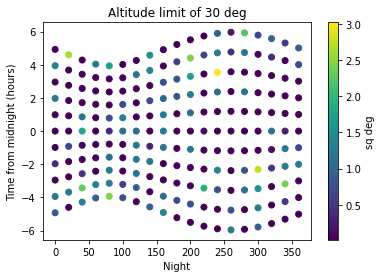

In [11]:
ack = plt.scatter(nights,rel_time*24,  c=np.degrees(lengths_30)*streak_width/3600.)
cb = plt.colorbar()
cb.set_label('sq deg')
plt.ylabel('Time from midnight (hours)')
plt.xlabel('Night')
plt.title('Altitude limit of 30 deg')

Text(0.5, 1.0, 'Altitude limit of 80 deg')

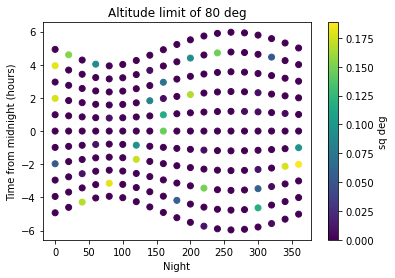

In [12]:
ack = plt.scatter(nights,rel_time*24,  c=np.degrees(lengths_80)*streak_width/3600.)
cb = plt.colorbar()
cb.set_label('sq deg')
plt.ylabel('Time from midnight (hours)')
plt.xlabel('Night')
plt.title('Altitude limit of 80 deg')

In [13]:
print('constellation size=', len(const), ' satellites')
print('Streak width = %.1f arcsec' % streak_width)
print('Exposure time = %.1f s' % (delta_t*24*3600))

constellation size= 30000  satellites
Streak width = 1.0 arcsec
Exposure time = 30.0 s


In [14]:
print('Median streak area 20 degree alt limit = %.2f sq deg' % np.median(np.degrees(lengths_20)*streak_width/3600.))
print('Median streak area 30 degree alt limit = %.2f sq deg' % np.median(np.degrees(lengths_30)*streak_width/3600.))
print('Median streak area 80 degree alt limit = %.2f sq deg' % np.median(np.degrees(lengths_80)*streak_width/3600.))

Median streak area 20 degree alt limit = 0.56 sq deg
Median streak area 30 degree alt limit = 0.04 sq deg
Median streak area 80 degree alt limit = 0.00 sq deg
